<a href="https://colab.research.google.com/github/rafaSouzaLima/trabalho-anisio/blob/main/Trabalho1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #manipulação de dados em formato de dataframe
import numpy as np #biblioteca para operações matemáticas multidimensionais
import seaborn as sns #biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt #biblioteca de visualização de dados
from scipy import stats
from google.colab import drive

drive.mount('/content/drive')

# Caminho do diretório escolhido
path = "/content/drive/MyDrive/Colab Notebooks"

df = pd.read_csv(path + '/age_dataset.csv', sep=',')
# Isso dropa todas as colunas até a maneira de morte
# df = df.dropna()

df = df[['Name', 'Short description', 'Gender', 'Country', 'Occupation', 'Birth year', 'Death year', 'Manner of death', 'Age of death']]


def numberOfClasses(df):
    n = df.shape[0]
    k = 1 + 3.322 * math.log10(n)
    print(f"Número de classes (k): {k:.2f}")
    return int(k)

def calcular_classes(df, k:int, column:str, frequency_name:str, labels):
    # Obtendo os valores mínimo e máximo da coluna 'renda'
    min_val = df[column].min()
    max_val = df[column].max()

    # Garantindo que k seja um inteiro
    k = int(k)

    # Calculando a amplitude total
    amplitude_total = max_val - min_val

    # Calculando a amplitude de cada classe
    amplitude_classe = amplitude_total / k

    classes_inferiores = []
    classes_superiores = []

    for i in range(k):
        limite_inferior = min_val + i * amplitude_classe
        limite_superior = min_val + (i + 1) * amplitude_classe

        # Ajustando a última classe para garantir que inclua o valor máximo
        if i == k - 1:
            limite_superior = max_val

        classes_inferiores.append(limite_inferior)
        classes_superiores.append(limite_superior)

    print("Limites Inferiores das Classes:", classes_inferiores)
    print("Limites Superiores das Classes:", classes_superiores)

    # Adiciona max_val para incluir o último intervalo
    bins = classes_inferiores + [max_val]
    limit = bins

    # Criando uma nova coluna com as classes
    df[frequency_name] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True)

    # Exibindo o DataFrame com as classes
    #print(df[[column, frequency_name]])

    return [df, bins]  # Retornando o DataFrame atualizado

df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0
...,...,...,...,...,...,...,...,...,...
1223004,Marie-Fortunée Besson,Frans model (1907-1996),NaN,France,Tailor; model,1907,1996.0,NaN,89.0
1223005,Ron Thorsen,xugador de baloncestu canadianu (1948–2004),NaN,Canada; United States of America,Athlete,1948,2004.0,NaN,56.0
1223006,Diether Todenhagen,German navy officer and world war II U-boat co...,NaN,Germany,Military personnel,1920,1944.0,NaN,24.0
1223007,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915.0,NaN,28.0


# 1. Escolha das Variáveis

Para escolhermos quais variáveis serão trabalhadas, antes vamos analisar a nulidade dos dados da tabela, que auxiliará em quais colunas há maior consistência dos dados para a realização de uma boa análise descritiva e exploratória.

In [ ]:
nulos = df.isnull().sum()

percentual_nulos = (nulos / len(df)) * 100

tabela_nulos = pd.DataFrame({
    'Frequência' : nulos,
    'Percentual (%)' : percentual_nulos
})

tabela_nulos

,Frequência,Percentual (%)
Name,0,0.000000
Short description,67900,5.551881
Gender,133646,10.927638
Country,335509,27.433077
Occupation,206914,16.918436
Birth year,0,0.000000
Death year,1,0.000082
Manner of death,1169406,95.617121
Age of death,1,0.000082


Além disso, na base de profissões vamos analisar as profissões mais frequentes presentes na amostra, excluindo valores nulos.

In [ ]:
df = df.dropna(subset=['Occupation'])

df['Occupation'].value_counts().head(20)

,count
Occupation,
Artist,281512
Politician,195390
Athlete,110943
Researcher,90709
Military personnel,52911
Religious figure,37086
Businessperson,19529
Architect,17865
Journalist,16002


Para a presente análise, escolheremos as variáveis Data de nascimento (`Birth year`) e Ocupação (`Occupation`), fixadas nas profissões militares (`Military personnel`), pesquisadores (`Researcher`) e atletas (`Athlete`). A ideia dessa análise é observar a distribuição dessas ocupações ao longo dos diferentes momentos da história, analisando se conforme se aproximamos da atualidade, aumentaram o número de pesquisadores, militares e atletas.

Essas variáveis foram escolhidas porque possuem baixas taxas de nulidade, o que garante uma análise com mais dados, diferente de variáveis como a causa da morte (`Manner of death`) que exclui 95% da amostra na análise.

Para filtragem inicial serão excluídos dados que possuem nulidade nas colunas de `Occupation`, `Birth year` e `Death year`. A coluna de `Death year` será utilizada para conferir se há validade no ano de nascimento ser menor do que o ano de morte.

In [ ]:
df = df[['Name', 'Occupation', 'Birth year', 'Death year']]
df = df.dropna(subset=['Occupation', 'Birth year', 'Death year'])

print(f'Linhas Total: {df.shape[0]}')
df = df[df['Birth year'] < df['Death year']]
print(f'Linhas Total: {df.shape[0]}')

militares = df[df['Occupation'] == 'Military personnel']
print(f'Linhas Militares: {militares.shape[0]}')

pesquisadores = df[df['Occupation'] == 'Researcher']
print(f'Linhas Pesquisadores: {pesquisadores.shape[0]}')

atletas = df[df['Occupation'] == 'Athlete']
print(f'Linhas Atletas: {atletas.shape[0]}')

militares

Linhas Total: 1016095
Linhas Total: 1016095
Linhas Militares: 52911
Linhas Pesquisadores: 90709
Linhas Atletas: 110943


,Name,Occupation,Birth year,Death year
51,Genghis Khan,Military personnel,1162,1227.0
213,Isaac Brock,Military personnel,1769,1812.0
238,Amy Johnson,Military personnel,1903,1941.0
262,Ernst Tiburzy,Military personnel,1911,2004.0
263,Charles Martel,Military personnel,688,741.0
...,...,...,...,...
1222939,Ludvík Planěk,Military personnel,1915,1943.0
1222953,François Guernon dit Belleville,Military personnel,1740,1817.0
1222958,David Hillhouse Buel,Military personnel,1839,1870.0
1222969,Jorge Adalberto Guirola Duke,Military personnel,1874,1906.0


Após isso vamos conferir se há dados nulos para os militares, pesquisadores e atletas.

In [ ]:
militares_nulos = militares.isnull().sum()

percentual_militares = (militares_nulos / len(militares)) * 100

tabela_militares_nulos = pd.DataFrame({
    'Total de Valores Nulos' : militares_nulos,
    'Percentual de nulos (%)' : percentual_militares
})

tabela_militares_nulos

,Total de Valores Nulos,Percentual de nulos (%)
Name,0,0.0
Occupation,0,0.0
Birth year,0,0.0
Death year,0,0.0


In [ ]:
pesquisadores_nulos = pesquisadores.isnull().sum()

percentual_pesquisadores = (pesquisadores_nulos / len(pesquisadores)) * 100

tabela_pesquisadores_nulos = pd.DataFrame({
    'Total de Valores Nulos' : pesquisadores_nulos,
    'Percentual de nulos (%)' : percentual_pesquisadores
})

tabela_pesquisadores_nulos

,Total de Valores Nulos,Percentual de nulos (%)
Name,0,0.0
Occupation,0,0.0
Birth year,0,0.0
Death year,0,0.0


In [ ]:
atletas_nulos = atletas.isnull().sum()

percentual_atletas = (atletas_nulos / len(atletas)) * 100

tabela_atletas_nulos = pd.DataFrame({
    'Total de Valores Nulos' : atletas_nulos,
    'Percentual de nulos (%)' : percentual_atletas
})

tabela_atletas_nulos

,Total de Valores Nulos,Percentual de nulos (%)
Name,0,0.0
Occupation,0,0.0
Birth year,0,0.0
Death year,0,0.0


Vale lembrar que anos de nascimento (`Birth year`) negativos nessa amostra, representam anos antes de cristo (`a.C.`), portanto não são considerados dados inválidos.

# 2. Análise Estatística Descritiva

Para começar, pode-se plotar um boxplot para analisar se existem `Outliers` que podem dificultar a visualização dos dados em outras representações gráficas, como histogramas.

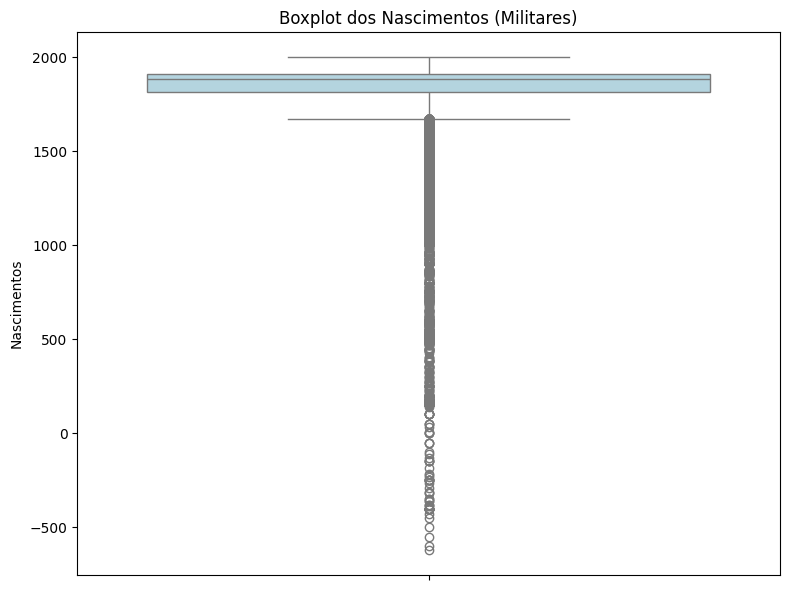

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Birth year', data=militares, color='lightblue')
plt.title('Boxplot dos Nascimentos (Militares)')
plt.ylabel('Nascimentos')

# Exibir o gráfico
plt.tight_layout()
plt.show()

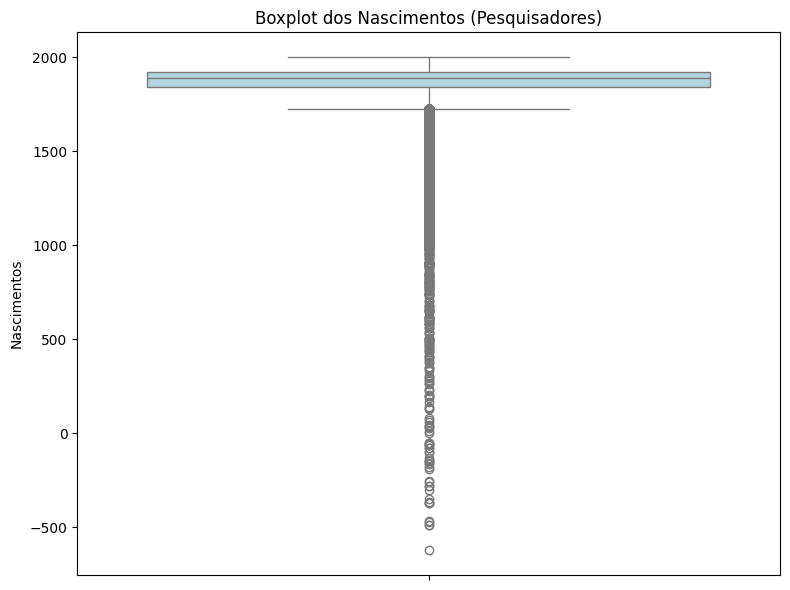

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Birth year', data=pesquisadores, color='lightblue')
plt.title('Boxplot dos Nascimentos (Pesquisadores)')
plt.ylabel('Nascimentos')

# Exibir o gráfico
plt.tight_layout()
plt.show()

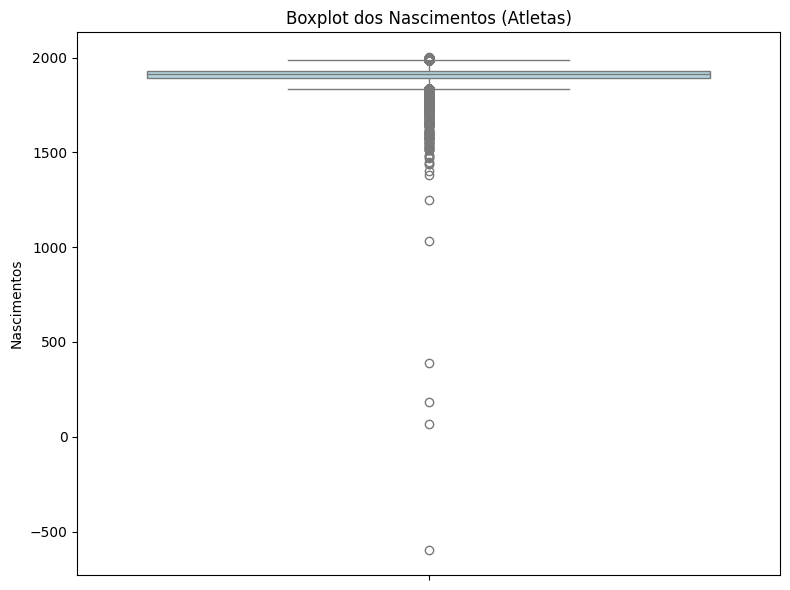

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Birth year', data=atletas, color='lightblue')
plt.title('Boxplot dos Nascimentos (Atletas)')
plt.ylabel('Nascimentos')

# Exibir o gráfico
plt.tight_layout()
plt.show()

Como pode ser visto, essa amostra para militares, pesquisadores e atletas possui um elevado número de `outliers` que pode significar que a amostra possui um elevado valor de indivíduos em momentos históricos discrepantes correlação aos anos de nascimento.

Para melhorar a nossa análise, vamos ocultar esses dados, para que possamos analisar melhores tendências dos dados dos militares, pesquisadores e atletas.

IQR: 95.0 anos
Desvio padrão: 175.73 anos

Máximo: 2000
Mínimo: -623
Limite inferior: 1670.5
Limite superior: 2050.5

Total de Indivíduos: 52911
Número de Outliers: 3703


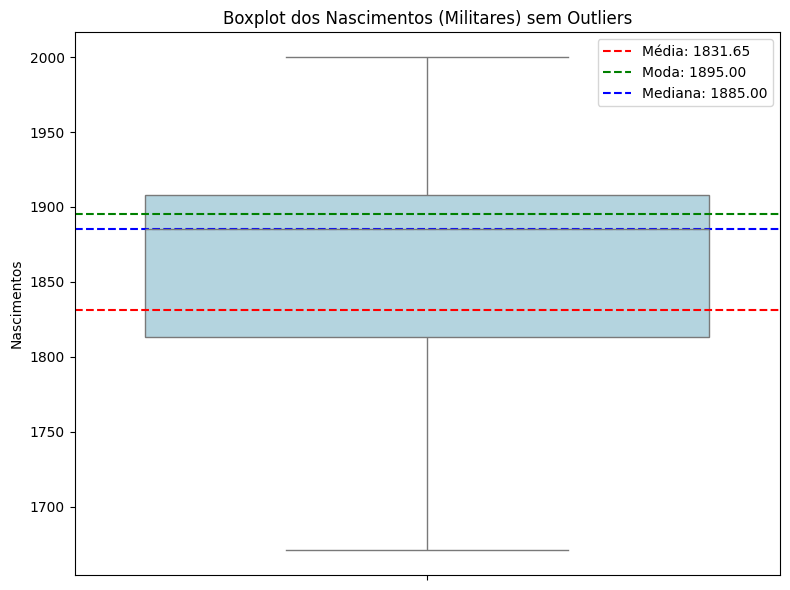

In [ ]:
# Calculando IQR, limites superior e inferior e desvio padrão
Q1 = militares['Birth year'].quantile(0.25)
Q3 = militares['Birth year'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
max = militares['Birth year'].max()
min = militares['Birth year'].min()

desvio_padrao = militares['Birth year'].describe()['std']

# Posteriormente utilizar resultado no histograma
filter = (militares['Birth year'] >= limite_inferior) & (militares['Birth year'] <= limite_superior)
militares_sem_outliers = militares.loc[filter]

# Média, moda, mediana
media1 = militares['Birth year'].mean()
moda1 = stats.mode(militares['Birth year'])[0]
mediana1 = militares['Birth year'].median()

print(f'IQR: {IQR} anos')
print(f'Desvio padrão: {desvio_padrao:.2f} anos')
print()
print(f'Máximo: {max}')
print(f'Mínimo: {min}')
print(f'Limite inferior: {limite_inferior}')
print(f'Limite superior: {limite_superior}')
print()
print(f'Total de Indivíduos: {len(militares)}')
print(f'Número de Outliers: {len(militares) - len(militares_sem_outliers)}')

estatisticas_militares = {
    'media' : [media1],
    'moda' : [moda1],
    'mediana' : [mediana1],
    'IQR' : [IQR],
    'std' : [desvio_padrao],
    'max' : [max],
    'min' : [min],
    'limite_superior' : [limite_superior],
    'limite_inferior' : [limite_inferior],
    'total' : [len(militares)],
    'outliers_count' : [len(militares) - len(militares_sem_outliers)]
}

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='Birth year', data=militares, color='lightblue', showfliers=False) # Última opção já esconde outliers
# Adicionar linha tracejada da média
plt.axhline(media1, color='red', linestyle='--', label=f'Média: {media1:.2f}')
# Adicionar linha tracejada da moda
plt.axhline(moda1, color='green', linestyle='--', label=f'Moda: {moda1:.2f}')
# Adicionar linha tracejada da mediana
plt.axhline(mediana1, color='blue', linestyle='--', label=f'Mediana: {mediana1:.2f}')

plt.title('Boxplot dos Nascimentos (Militares) sem Outliers')
plt.ylabel('Nascimentos')
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

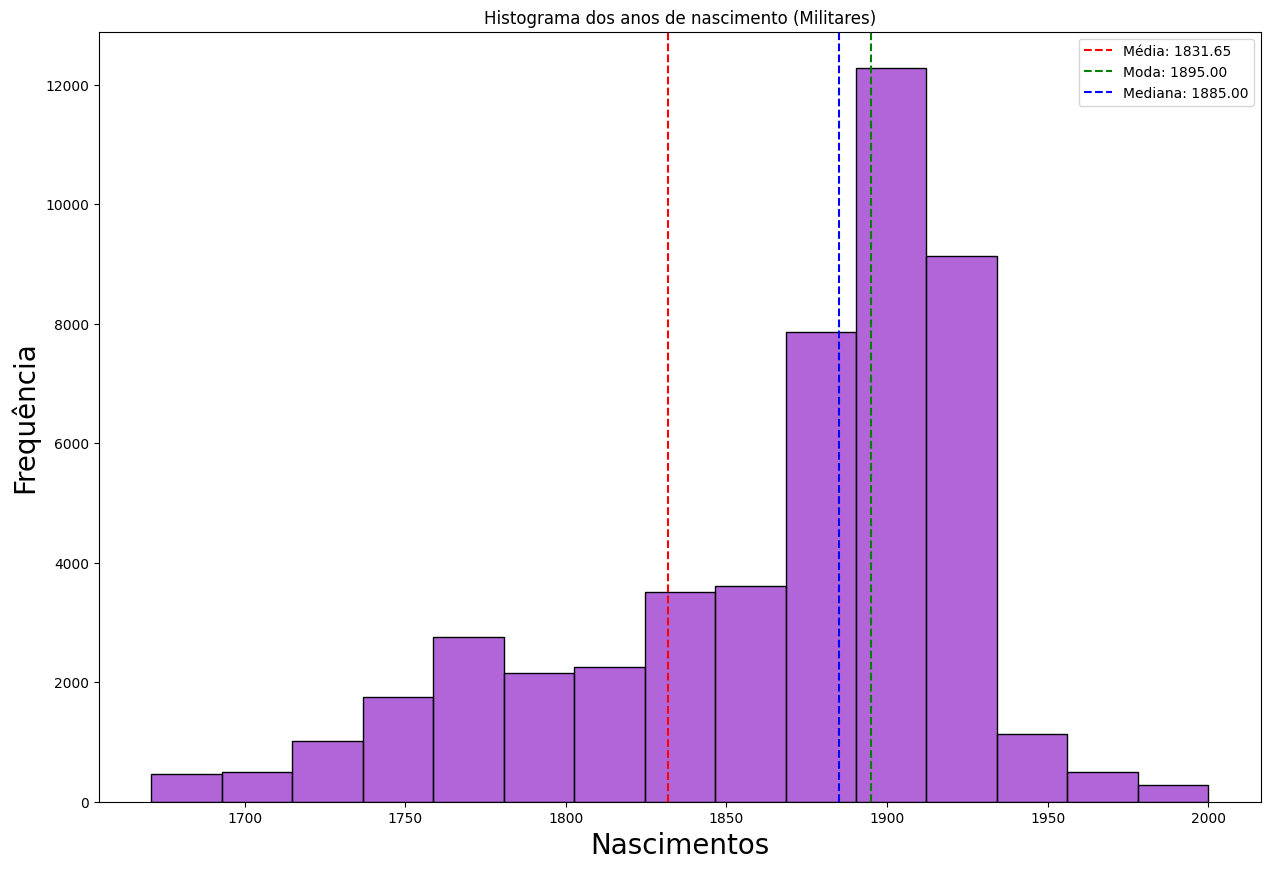

In [ ]:
# Histograma
plt.figure(figsize=(15,10))
sns.histplot(data=militares_sem_outliers, x='Birth year', bins=15, color='darkorchid')
# Adicionar linha tracejada da média
plt.axvline(media1, color='red', linestyle='--', label=f'Média: {media1:.2f}')
# Adicionar linha tracejada da moda
plt.axvline(moda1, color='green', linestyle='--', label=f'Moda: {moda1:.2f}')
# Adicionar linha tracejada da mediana
plt.axvline(mediana1, color='blue', linestyle='--', label=f'Mediana: {mediana1:.2f}')

plt.title('Histograma dos anos de nascimento (Militares)')
plt.xlabel('Nascimentos', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.legend()
plt.show()

IQR: 78.0 anos
Desvio padrão: 115.84 anos

Máximo: 2000
Mínimo: -624
Limite inferior: 1725.0
Limite superior: 2037.0

Total de Indivíduos: 90709
Número de Outliers: 6062


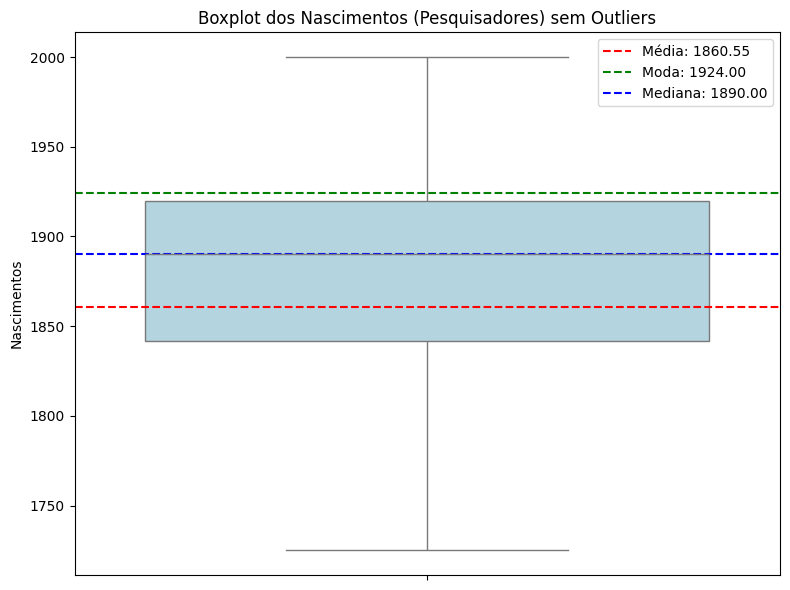

In [ ]:
# Calculando IQR, limites superior e inferior e desvio padrão
Q1 = pesquisadores['Birth year'].quantile(0.25)
Q3 = pesquisadores['Birth year'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
max = pesquisadores['Birth year'].max()
min = pesquisadores['Birth year'].min()

desvio_padrao = pesquisadores['Birth year'].describe()['std']

# Posteriormente utilizar resultado no histograma
filter = (pesquisadores['Birth year'] >= limite_inferior) & (pesquisadores['Birth year'] <= limite_superior)
pesquisadores_sem_outliers = pesquisadores.loc[filter]

# Média, moda, mediana
media2 = pesquisadores['Birth year'].mean()
moda2 = stats.mode(pesquisadores['Birth year'])[0]
mediana2 = pesquisadores['Birth year'].median()

print(f'IQR: {IQR} anos')
print(f'Desvio padrão: {desvio_padrao:.2f} anos')
print()
print(f'Máximo: {max}')
print(f'Mínimo: {min}')
print(f'Limite inferior: {limite_inferior}')
print(f'Limite superior: {limite_superior}')
print()
print(f'Total de Indivíduos: {len(pesquisadores)}')
print(f'Número de Outliers: {len(pesquisadores) - len(pesquisadores_sem_outliers)}')
estatisticas_pesquisadores = {
    'media' : [media2],
    'moda' : [moda2],
    'mediana' : [mediana2],
    'IQR' : [IQR],
    'std' : [desvio_padrao],
    'max' : [max],
    'min' : [min],
    'limite_superior' : [limite_superior],
    'limite_inferior' : [limite_inferior],
    'total' : [len(pesquisadores)],
    'outliers_count' : [len(pesquisadores) - len(pesquisadores_sem_outliers)]
}

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='Birth year', data=pesquisadores, color='lightblue', showfliers=False) # Última opção já esconde outliers

# Adicionar linha tracejada da média
plt.axhline(media2, color='red', linestyle='--', label=f'Média: {media2:.2f}')
# Adicionar linha tracejada da moda
plt.axhline(moda2, color='green', linestyle='--', label=f'Moda: {moda2:.2f}')
# Adicionar linha tracejada da mediana
plt.axhline(mediana2, color='blue', linestyle='--', label=f'Mediana: {mediana2:.2f}')

plt.title('Boxplot dos Nascimentos (Pesquisadores) sem Outliers')
plt.ylabel('Nascimentos')
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

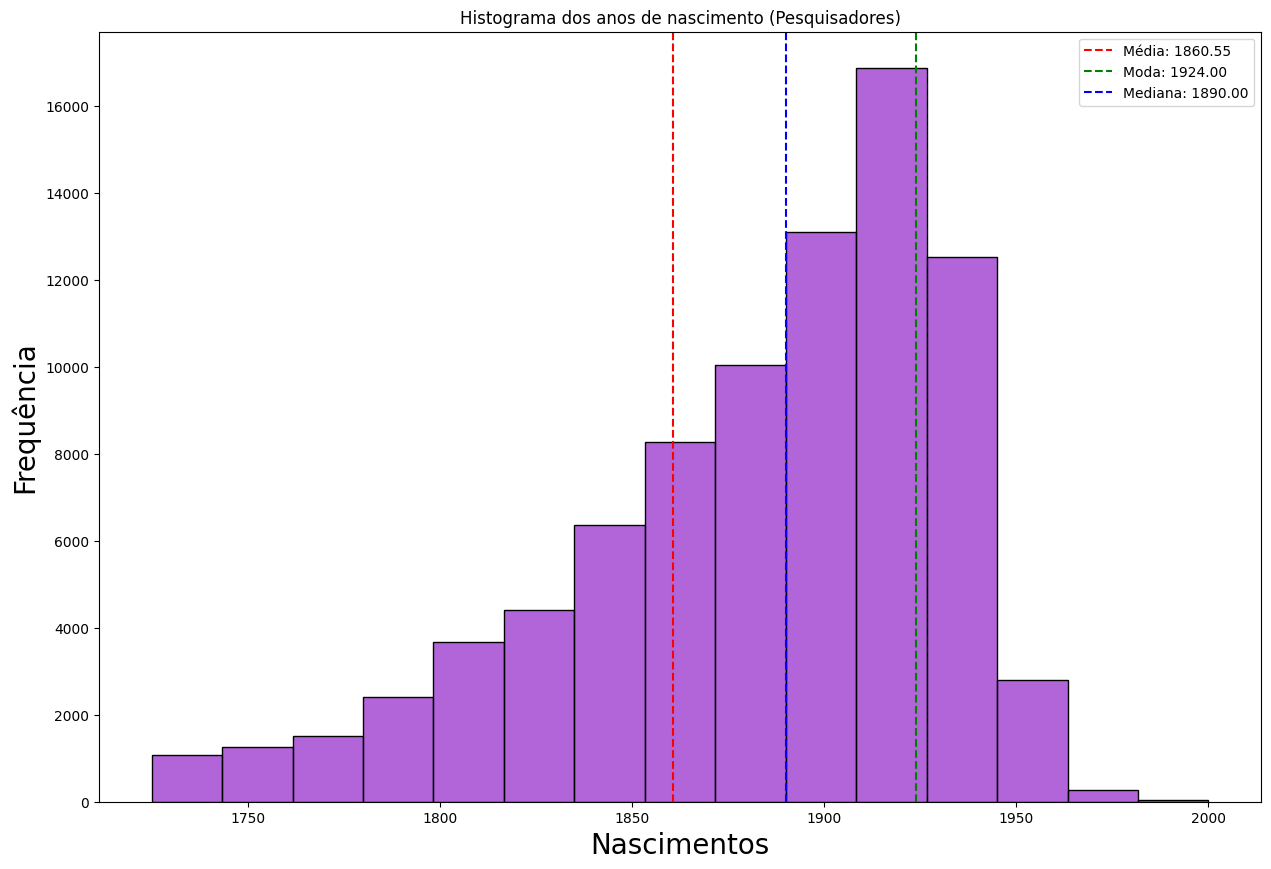

In [ ]:
# Histograma
plt.figure(figsize=(15,10))
sns.histplot(data=pesquisadores_sem_outliers, x='Birth year', bins=15, color='darkorchid')
# Adicionar linha tracejada da média
plt.axvline(media2, color='red', linestyle='--', label=f'Média: {media2:.2f}')
# Adicionar linha tracejada da moda
plt.axvline(moda2, color='green', linestyle='--', label=f'Moda: {moda2:.2f}')
# Adicionar linha tracejada da mediana
plt.axvline(mediana2, color='blue', linestyle='--', label=f'Mediana: {mediana2:.2f}')

plt.title('Histograma dos anos de nascimento (Pesquisadores)')
plt.xlabel('Nascimentos', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.legend()
plt.show()

IQR: 38.0 anos
Desvio padrão: 34.25 anos

Máximo: 2003
Mínimo: -600
Limite inferior: 1835.0
Limite superior: 1987.0

Total de Indivíduos: 110943
Número de Outliers: 2258


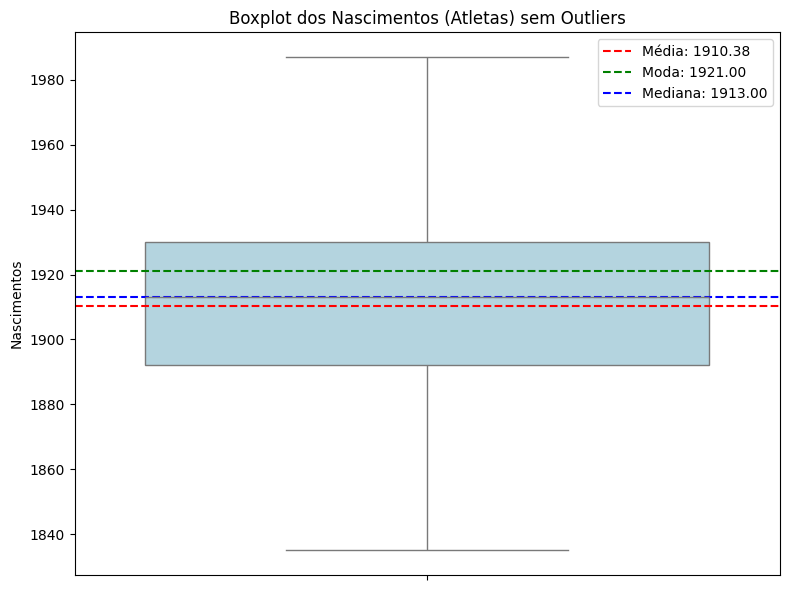

In [ ]:
# Calculando IQR, limites superior e inferior e desvio padrão
Q1 = atletas['Birth year'].quantile(0.25)
Q3 = atletas['Birth year'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
max = atletas['Birth year'].max()
min = atletas['Birth year'].min()

desvio_padrao = atletas['Birth year'].describe()['std']

# Posteriormente utilizar resultado no histograma
filter = (atletas['Birth year'] >= limite_inferior) & (atletas['Birth year'] <= limite_superior)
atletas_sem_outliers = atletas.loc[filter]

# Média, moda, mediana
media3 = atletas['Birth year'].mean()
moda3 = stats.mode(atletas['Birth year'])[0]
mediana3 = atletas['Birth year'].median()

print(f'IQR: {IQR} anos')
print(f'Desvio padrão: {desvio_padrao:.2f} anos')
print()
print(f'Máximo: {max}')
print(f'Mínimo: {min}')
print(f'Limite inferior: {limite_inferior}')
print(f'Limite superior: {limite_superior}')
print()
print(f'Total de Indivíduos: {len(atletas)}')
print(f'Número de Outliers: {len(atletas) - len(atletas_sem_outliers)}')
estatisticas_atletas = {
    'media' : [media3],
    'moda' : [moda3],
    'mediana' : [mediana3],
    'IQR' : [IQR],
    'std' : [desvio_padrao],
    'max' : [max],
    'min' : [min],
    'limite_superior' : [limite_superior],
    'limite_inferior' : [limite_inferior],
    'total' : [len(atletas)],
    'outliers_count' : [len(atletas) - len(atletas_sem_outliers)]
}

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='Birth year', data=atletas, color='lightblue', showfliers=False) # Última opção já esconde outliers

# Adicionar linha tracejada da média
plt.axhline(media3, color='red', linestyle='--', label=f'Média: {media3:.2f}')
# Adicionar linha tracejada da moda
plt.axhline(moda3, color='green', linestyle='--', label=f'Moda: {moda3:.2f}')
# Adicionar linha tracejada da mediana
plt.axhline(mediana3, color='blue', linestyle='--', label=f'Mediana: {mediana3:.2f}')

plt.title('Boxplot dos Nascimentos (Atletas) sem Outliers')
plt.ylabel('Nascimentos')
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

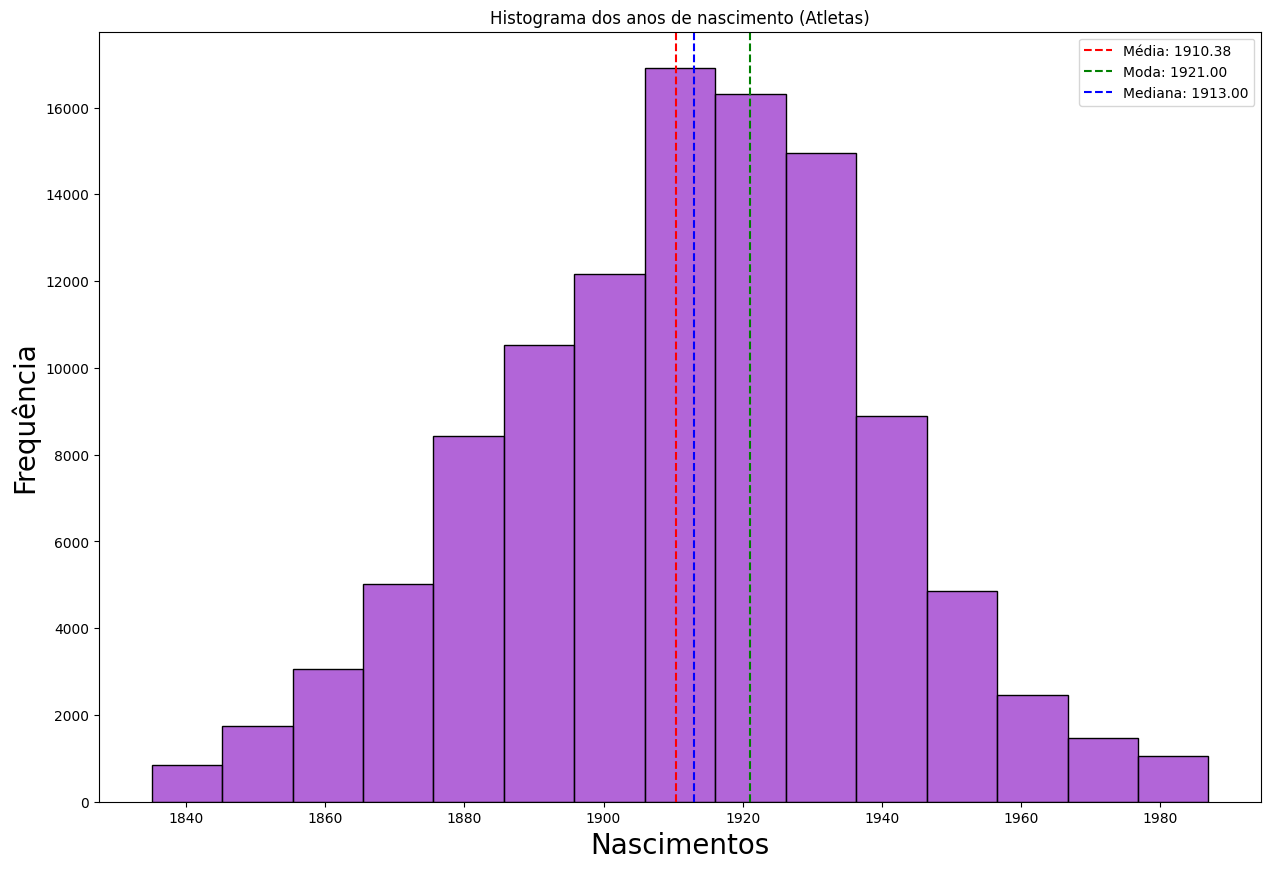

In [ ]:
# Histograma
plt.figure(figsize=(15,10))
sns.histplot(data=atletas_sem_outliers, x='Birth year', bins=15, color='darkorchid')
# Adicionar linha tracejada da média
plt.axvline(media3, color='red', linestyle='--', label=f'Média: {media3:.2f}')
# Adicionar linha tracejada da moda
plt.axvline(moda3, color='green', linestyle='--', label=f'Moda: {moda3:.2f}')
# Adicionar linha tracejada da mediana
plt.axvline(mediana3, color='blue', linestyle='--', label=f'Mediana: {mediana3:.2f}')

plt.title('Histograma dos anos de nascimento (Atletas)')
plt.xlabel('Nascimentos', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.legend()
plt.show()

Como a quantidade de `outliers` nos militares, pesquisadores e atletas é elevada, medidas de centralidade como a média não são boas para representar a amostra, por isso é aconselhável a utilização da mediana nesses casos.

# 3. Formulação e Demonstração de Hipótese

A hipótese exploratória escolhida é que as profissões Militar e Pesquisador aumentaram em períodos de diversos conflitos ao redor do mundo que explodiram no começo do século XX, por conta da alta necessidade de avanços tecnológicos e conquista de território. Também espera-se que profissões como Atletas, aumentem em períodos de menos conflitos e mais voltados para propaganda política e influência, como a Guerra Fria (1947-1991).

Para melhor comparação, será feita uma tabela para comparar estatísticas mostradas anteriormente.

In [ ]:
df_militares_est = pd.DataFrame(estatisticas_militares).transpose()
df_pesquisadores_est = pd.DataFrame(estatisticas_pesquisadores).transpose()
df_atletas_est = pd.DataFrame(estatisticas_atletas).transpose()

estatisticas_gerais = pd.concat([
    df_militares_est,
    df_pesquisadores_est,
    df_atletas_est
], axis=1)  # Usando axis=1 para concatenar ao longo das colunas
estatisticas_gerais.columns = ['Militares', 'Pesquisadores', 'Atletas']

estatisticas_gerais

,Militares,Pesquisadores,Atletas
media,1831.650507,1860.546197,1910.382737
moda,1895.000000,1924.000000,1921.000000
mediana,1885.000000,1890.000000,1913.000000
IQR,95.000000,78.000000,38.000000
std,175.733147,115.842093,34.247488
max,2000.000000,2000.000000,2003.000000
min,-623.000000,-624.000000,-600.000000
limite_superior,2050.500000,2037.000000,1987.000000
limite_inferior,1670.500000,1725.000000,1835.000000
total,52911.000000,90709.000000,110943.000000


Também será feita uma comparação da frequência de nascimentos das três ocupações em uma tabela cruzada. Nesse caso, os `outliers` também serão retirados para facilitar compreensão dos dados.

In [ ]:
def classe_periodo(ano):
  inicio = (ano // 50) * 50

  return f'{inicio}-{inicio+49}'

# Concatena os dataframes e classifica-os
merged_df = pd.concat([militares_sem_outliers, pesquisadores_sem_outliers, atletas_sem_outliers], axis=0, ignore_index=True)
merged_df['Birth year class'] = merged_df['Birth year'].apply(classe_periodo)

# Cria a crosstab
frequency_merged_df = pd.crosstab(
    index=merged_df['Occupation'],
    columns=merged_df['Birth year class'],
    margins=True,
    margins_name='Total'
)

total = frequency_merged_df['Total']
frequency_merged_percentage = frequency_merged_df.div(total, axis=0) * 100
frequency_merged_percentage

Birth year class,1650-1699,1700-1749,1750-1799,1800-1849,1850-1899,1900-1949,1950-1999,2000-2049,Total
Occupation,,,,,,,,,
Athlete,0.000000,0.000000,0.000000,1.327690,29.910291,61.454663,7.307356,0.000000,100.0
Military personnel,1.188831,4.619168,11.193302,12.969436,36.620062,31.372947,2.019997,0.016258,100.0
Researcher,0.000000,1.690550,5.912791,15.064917,30.224343,45.021088,2.069772,0.016539,100.0
Total,0.241197,1.527171,4.334543,8.483961,31.381215,49.616146,4.406696,0.009071,100.0


Analisando as tabelas de comparação de estatísticas e as frequências por épocas das três profissões, podemos notar que para militares e pesquisadores, houve um elevado aumento durante o começo do século XX que seria o prelúdio para uma série de conflitos militares que ocorreriam que são a Primeira e a Segunda Guerra Mundial, o que faz sentido.

Além disso, para os atletas, é possível ver que há um início mais tardio, porém mais acentuado e intenso durante um período superior ao início do século XX (por exemplo mais da metade dos atletas nasceram no período [1900-1949]), indicando que eles teriam papel de destaque em tempos de trégua como o período Entre Guerras e a Guerra Fria.

# 4. Conclusão

Portanto, pode-se concluir que as profissões Militares e Pesquisadores tiveram um elevado aumento em períodos de conflitos e necessidades tecnológicas e Atletas tiveram um aumento mais tardio correlação a essas outras profissões, indicando uma maior presença no período Entre Guerras e principalmente na Guerra Fria, o que pode ser visto tanto nas tabelas, como nos histogramas demonstrados.

Entretanto, nessa amostra há um problema que poderia melhorar a precisão da análise. Se analisarmos o teste de nulidade inicial feito com a base de dados `age_dataset.csv` o campo `Death year` basicamente não possui quase nenhum valor nulo. Isso significa que todos os indivíduos dessa amostra não estão mais vivos, por terem um ano de morte. Por isso, não podemos identificar tendências concretas próximas da década de 90 para algumas profissões.

Além disso, como foi usado o campo `Birth year`, os dados de uma determinada profissão são relativos a um certo período após a pessoa iniciar de fato a exercer a própria profissão, e isso varia de indivíduo para indivíduo. Por isso se houvesse a idade com a qual o indivíduo iniciou as atividades em sua profissão, isso clarificaria a análise, deixando-a mais objetiva.